# COMPARISON OF METRICS ACROSS ALGORITHMS WITHOUT HYPERPARAMETER TUNING

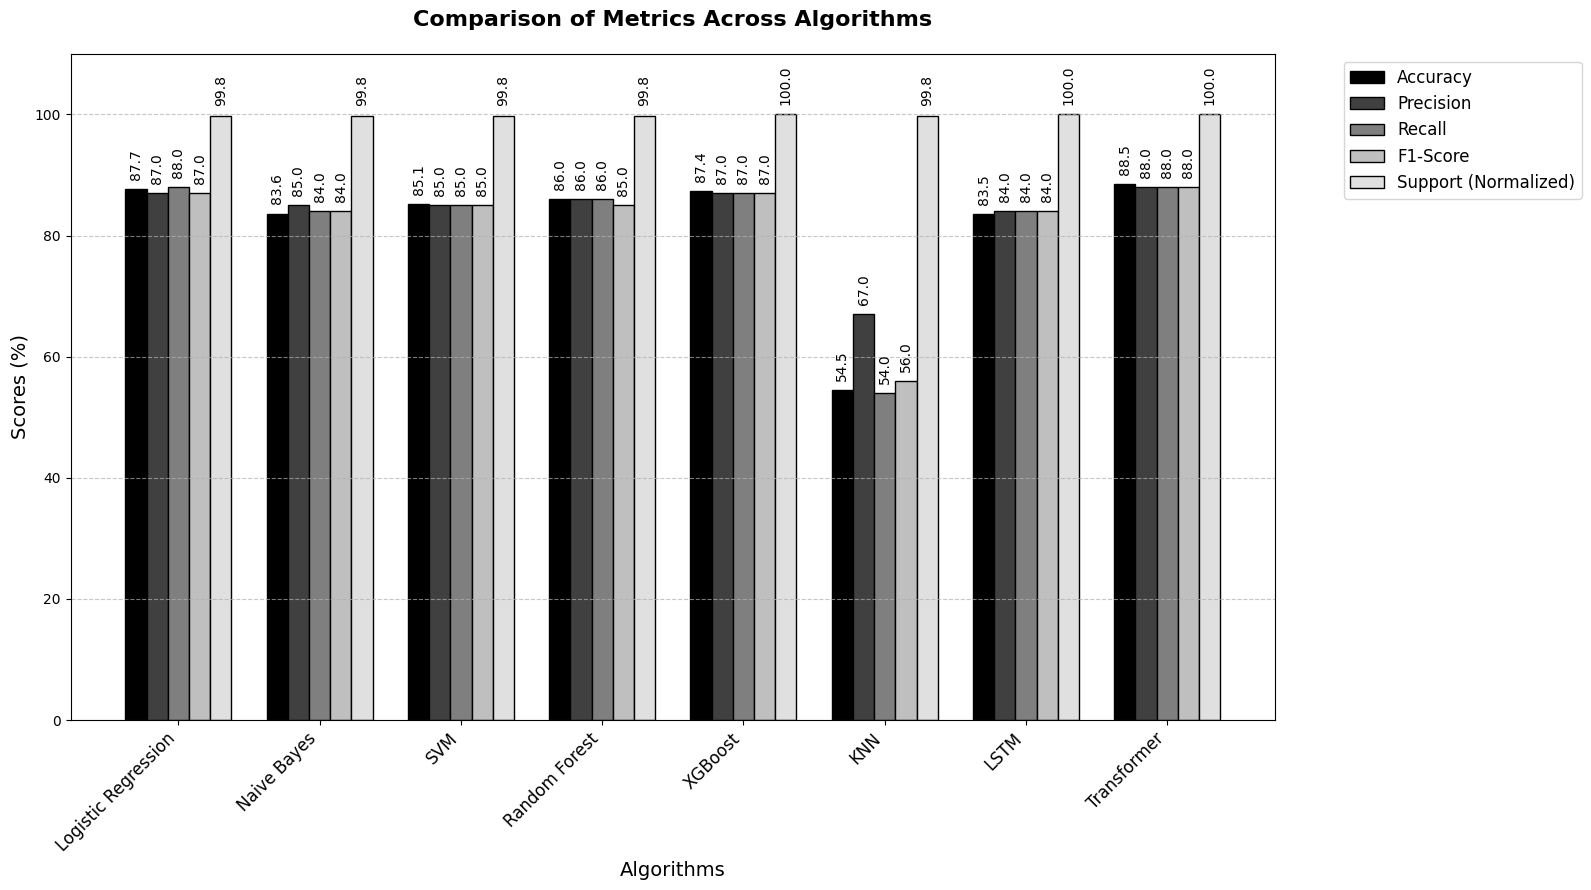

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Data
algorithms = ['Logistic Regression', 'Naive Bayes', 'SVM', 'Random Forest', 'XGBoost', 'KNN', 'LSTM', 'Transformer']
accuracy = [87.66, 83.63, 85.13, 86.00, 87.39, 54.46, 83.55, 88.5]
precision = [87.0, 85.0, 85.0, 86.0, 87.0, 67.0, 84.0, 88.0]
recall = [88.0, 84.0, 85.0, 86.0, 87.0, 54.0, 84.0, 88.0]
f1_score = [87.0, 84.0, 85.0, 85.0, 87.0, 56.0, 84.0, 88.0]
support = [99.81, 99.81, 99.81, 99.81, 100.0, 99.81, 100.0, 100.0]

# Grayscale palette
gray_shades = ['#000000', '#404040', '#7f7f7f', '#bfbfbf', '#e0e0e0']  # black → light gray

# Bar width & positions
width = 0.15
x = np.arange(len(algorithms))

plt.figure(figsize=(16, 9))

# Plot bars in grayscale
plt.bar(x - 2*width, accuracy, width, label='Accuracy', color=gray_shades[0], edgecolor='black')
plt.bar(x - width,  precision, width, label='Precision', color=gray_shades[1], edgecolor='black')
plt.bar(x,          recall,    width, label='Recall',    color=gray_shades[2], edgecolor='black')
plt.bar(x + width,  f1_score,  width, label='F1-Score',  color=gray_shades[3], edgecolor='black')
plt.bar(x + 2*width,support,   width, label='Support (Normalized)', color=gray_shades[4], edgecolor='black')

# Titles and labels
plt.title('Comparison of Metrics Across Algorithms', fontsize=16, weight='bold', pad=20)
plt.ylabel('Scores (%)', fontsize=14)
plt.xlabel('Algorithms', fontsize=14)
plt.xticks(x, algorithms, rotation=45, ha="right", fontsize=12)

# Grid & legend
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))

# Value labels
def add_labels(values, positions, offset):
    for i, v in enumerate(values):
        plt.text(
            positions[i] + offset, v + 1.5, f"{v:.1f}",
            ha='center', va='bottom', fontsize=10, color='black', rotation=90
        )

add_labels(accuracy, x, -2*width)
add_labels(precision, x, -width)
add_labels(recall, x, 0)
add_labels(f1_score, x, width)
add_labels(support, x, 2*width)

# Final layout tweaks
plt.ylim(0, 110)
plt.tight_layout()
plt.subplots_adjust(right=0.8)
plt.show()


# COMPARISON AFTER HYPERPARAMETER TUNING

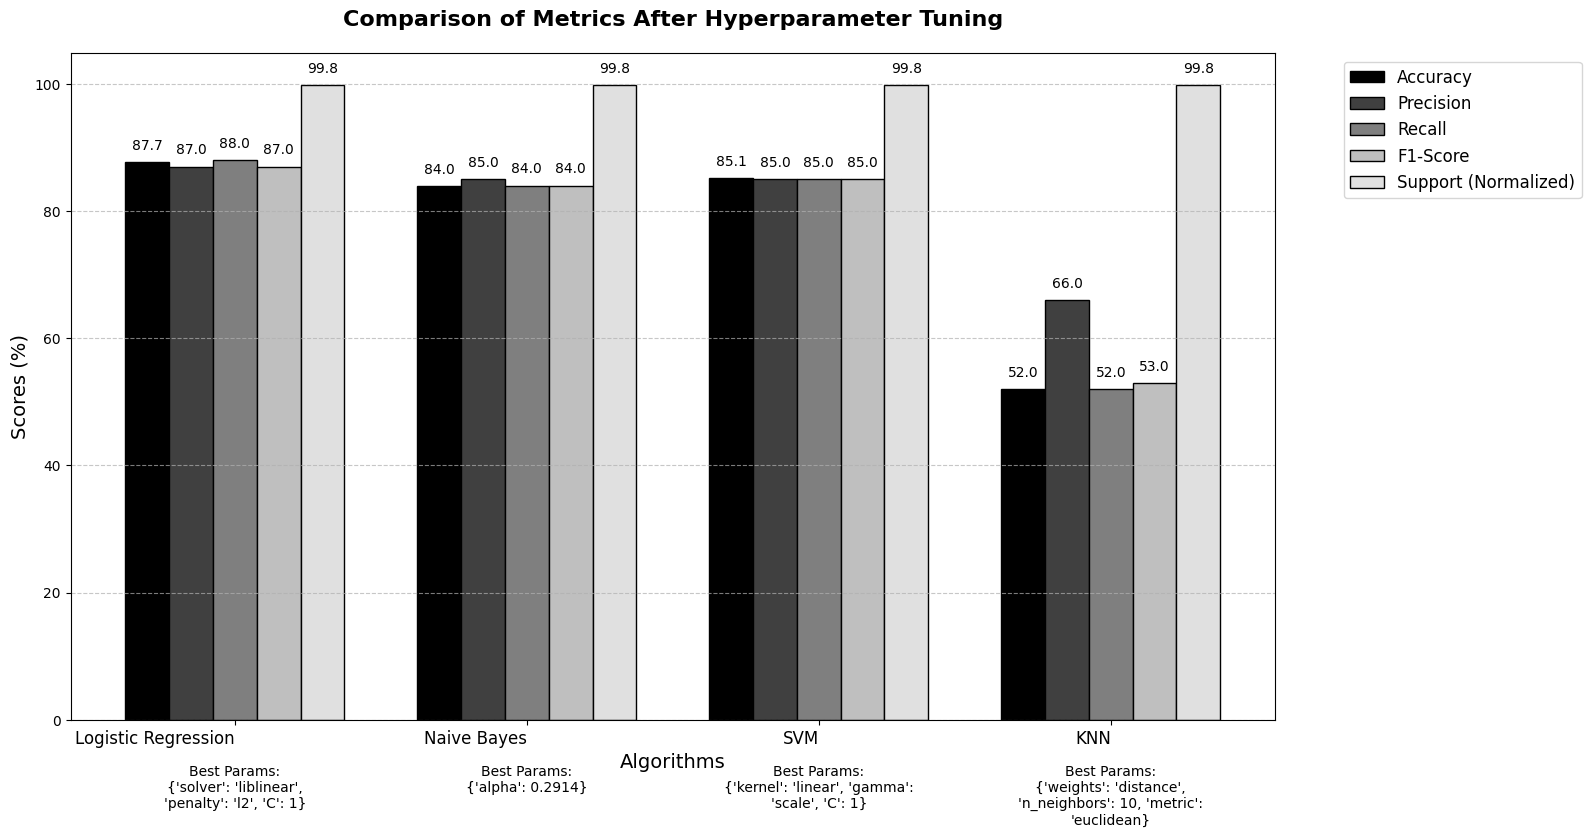

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import textwrap

# Data for algorithms after hyperparameter tuning
algorithms = ['Logistic Regression', 'Naive Bayes', 'SVM', 'KNN']
accuracy = [87.72, 83.95, 85.13, 52.03]  # From accuracy values
precision = [87.0, 85.0, 85.0, 66.0]  # Weighted avg precision
recall = [88.0, 84.0, 85.0, 52.0]  # Weighted avg recall
f1_score = [87.0, 84.0, 85.0, 53.0]  # Weighted avg F1
support = [99.81, 99.81, 99.81, 99.81]  # Total support (normalized)

# Best hyperparameters for each algorithm
best_params = [
    "{'solver': 'liblinear', 'penalty': 'l2', 'C': 1}",  # Logistic Regression
    "{'alpha': 0.2914}",  # Naive Bayes
    "{'kernel': 'linear', 'gamma': 'scale', 'C': 1}",  # SVM
    "{'weights': 'distance', 'n_neighbors': 10, 'metric': 'euclidean}"  # KNN
]

# Bar width
width = 0.15

# X-axis positions
x = np.arange(len(algorithms))

# Set figure size
plt.figure(figsize=(16, 9))  # Increased size for clarity

# Plot bars with distinct offsets
plt.bar(x - 2*width, accuracy, width, label='Accuracy', color=gray_shades[0], edgecolor='black')
plt.bar(x - width, precision, width, label='Precision', color=gray_shades[1], edgecolor='black')
plt.bar(x, recall, width, label='Recall', color=gray_shades[2], edgecolor='black')
plt.bar(x + width, f1_score, width, label='F1-Score', color=gray_shades[3], edgecolor='black')
plt.bar(x + 2*width, support, width, label='Support (Normalized)', color=gray_shades[4], edgecolor='black')

# Titles and labels
plt.title('Comparison of Metrics After Hyperparameter Tuning', fontsize=16, weight='bold', pad=20)
plt.ylabel('Scores (%)', fontsize=14)
plt.xlabel('Algorithms', fontsize=14)
plt.xticks(x, algorithms, rotation=45, ha="right", fontsize=12)

# Add grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add legend outside the plot
plt.legend(fontsize=12, loc='upper left', bbox_to_anchor=(1.05, 1))

# Add values on top of the bars
def add_labels(values, positions, offset, color):
    for i, v in enumerate(values):
        plt.text(positions[i] + offset, v + 1.5, f"{v:.1f}", ha='center', va='bottom', fontsize=10, color=color)

add_labels(accuracy, x, -2*width, 'black')
add_labels(precision, x, -width, 'black')
add_labels(recall, x, 0, 'black')
add_labels(f1_score, x, width, 'black')
add_labels(support, x, 2*width, 'black')

# Function to wrap the best hyperparameters text
def wrap_text(text, width=30):
    return "\n".join(textwrap.wrap(text, width=width))

# Annotating best hyperparameters (with word wrap)
y_position = -7  # Adjusted y position for the best parameters to be below the x-axis
y_offset = 0
for i, params in enumerate(best_params):
    # Apply word wrapping to the best parameters text
    wrapped_params = wrap_text(params, width=30)  # Adjust width as needed

    plt.text(x[i], y_position + y_offset, f"Best Params:\n{wrapped_params}", ha='center', va='top', fontsize=10, color='black', rotation=0)

# Adjust layout to prevent clipping
plt.tight_layout()
plt.subplots_adjust(right=0.8)  # Add space for the legend

plt.xticks(rotation=0)

# Show the plot
plt.show()

# COMPARISON OF ENSEMBLE MODEL AND BASE MODELS

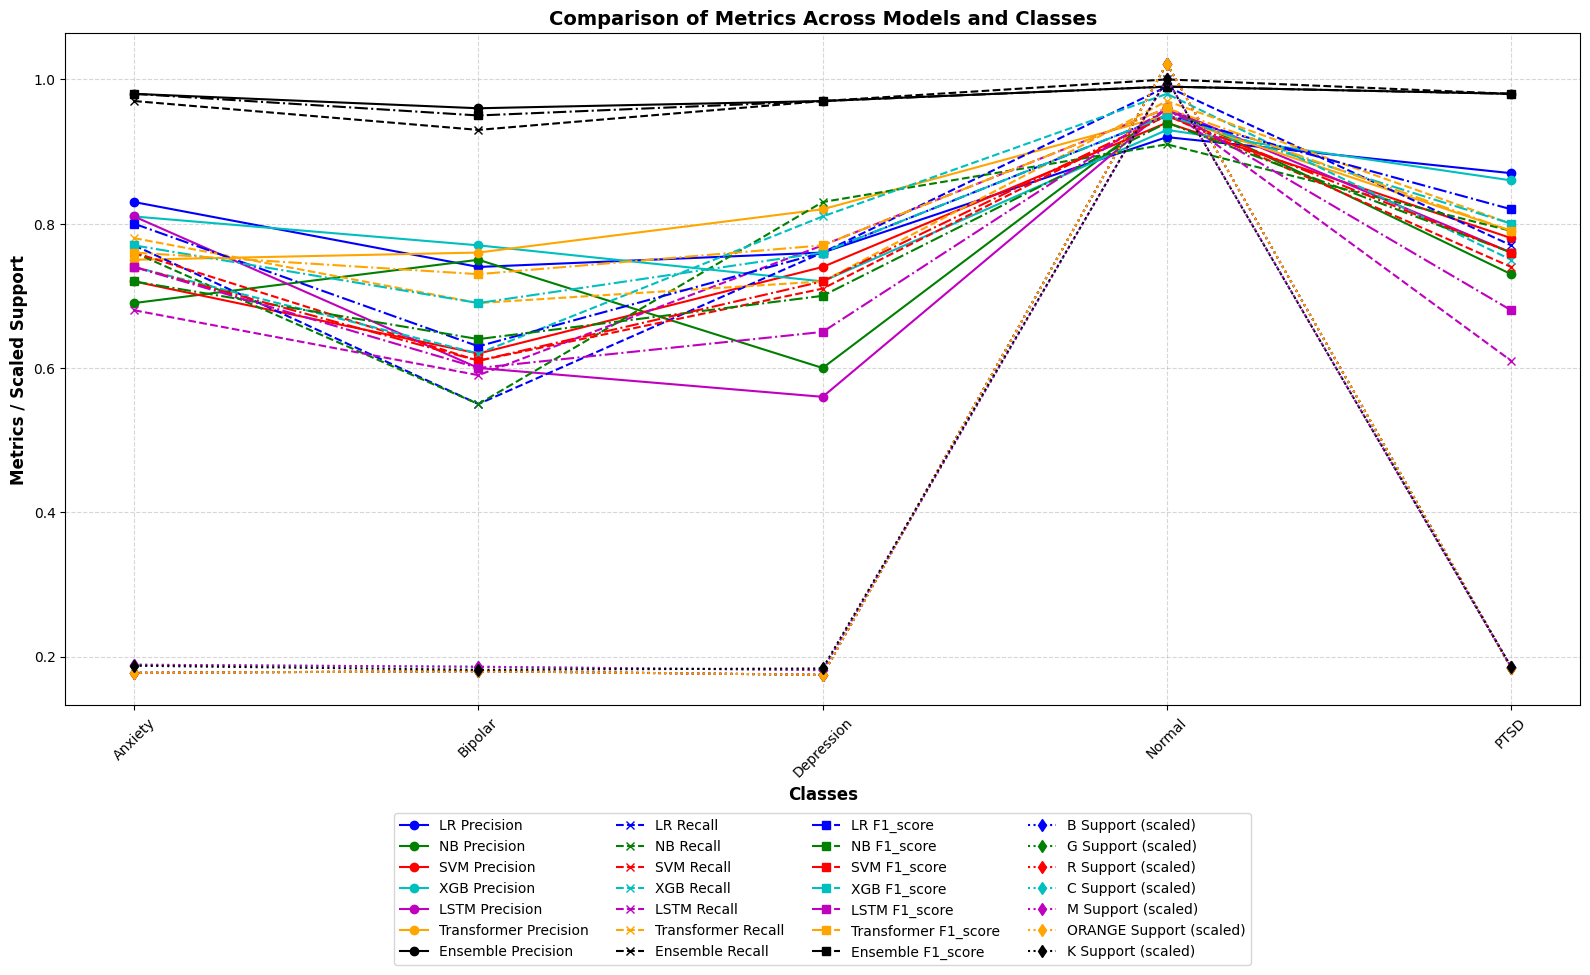

In [ ]:
import matplotlib.pyplot as plt

# Classes and Metrics
classes = ["Anxiety", "Bipolar", "Depression", "Normal", "PTSD"]

# Model Metrics
logistic_regression = {
    "precision": [0.83, 0.74, 0.76, 0.92, 0.87],
    "recall": [0.77, 0.55, 0.76, 0.99, 0.77],
    "f1_score": [0.80, 0.63, 0.76, 0.95, 0.82],
    "support": [379, 384, 373, 2183, 394],
}

naive_bayes = {
    "precision": [0.69, 0.75, 0.60, 0.96, 0.73],
    "recall": [0.76, 0.55, 0.83, 0.91, 0.79],
    "f1_score": [0.72, 0.64, 0.70, 0.94, 0.76],
    "support": [379, 384, 373, 2183, 394],
}

svm = {
    "precision": [0.72, 0.62, 0.74, 0.94, 0.78],
    "recall": [0.76, 0.61, 0.71, 0.95, 0.74],
    "f1_score": [0.74, 0.61, 0.72, 0.95, 0.76],
    "support": [379, 384, 373, 2183, 394],
}

xgboost = {
    "precision": [0.81, 0.77, 0.72, 0.93, 0.86],
    "recall": [0.74, 0.62, 0.81, 0.98, 0.75],
    "f1_score": [0.77, 0.69, 0.76, 0.95, 0.80],
    "support": [403, 397, 387, 2137, 396],
}

lstm = {
    "precision": [0.81, 0.60, 0.56, 0.96, 0.76],
    "recall": [0.68, 0.59, 0.77, 0.96, 0.61],
    "f1_score": [0.74, 0.60, 0.65, 0.96, 0.68],
    "support": [403, 397, 387, 2137, 396],
}

transformer = {
    "precision": [0.75, 0.76, 0.82, 0.95, 0.79],
    "recall": [0.78, 0.69, 0.72, 0.97, 0.80],
    "f1_score": [0.76, 0.73, 0.77, 0.96, 0.79],
    "support": [379, 384, 373, 2183, 394]
}

ensemble = {
    "precision": [0.98, 0.96, 0.97, 0.99, 0.98],
    "recall": [0.97, 0.93, 0.97, 1.00, 0.98],
    "f1_score": [0.98, 0.95, 0.97, 0.99, 0.98],
    "support": [400, 388, 392, 2136, 397]
}

# Line Plot Setup
plt.figure(figsize=(16, 10))

# Plot metrics for each model
for metric, marker, linestyle in zip(
    ["precision", "recall", "f1_score"],
    ['o', 'x', 's'],
    ['-', '--', '-.']
):
    plt.plot(classes, logistic_regression[metric], marker=marker, label=f'LR {metric.capitalize()}', color='b', linestyle=linestyle)
    plt.plot(classes, naive_bayes[metric], marker=marker, label=f'NB {metric.capitalize()}', color='g', linestyle=linestyle)
    plt.plot(classes, svm[metric], marker=marker, label=f'SVM {metric.capitalize()}', color='r', linestyle=linestyle)
    plt.plot(classes, xgboost[metric], marker=marker, label=f'XGB {metric.capitalize()}', color='c', linestyle=linestyle)
    plt.plot(classes, lstm[metric], marker=marker, label=f'LSTM {metric.capitalize()}', color='m', linestyle=linestyle)
    plt.plot(classes, transformer[metric], marker=marker, label=f'Transformer {metric.capitalize()}', color='orange', linestyle=linestyle)
    plt.plot(classes, ensemble[metric], marker=marker, label=f'Ensemble {metric.capitalize()}', color='k', linestyle=linestyle)

# Plot scaled support for visualization
for model, color in zip(
    [logistic_regression, naive_bayes, svm, xgboost, lstm, transformer, ensemble],
    ['b', 'g', 'r', 'c', 'm', 'orange', 'k']
):
    scaled_support = [x / max(ensemble["support"]) for x in model["support"]]
    plt.plot(classes, scaled_support, marker='d', label=f'{color.upper()} Support (scaled)', linestyle=':', color=color)

# Add plot details
plt.title("Comparison of Metrics Across Models and Classes", fontweight="bold", fontsize=14)
plt.xlabel("Classes", fontweight="bold", fontsize=12)
plt.ylabel("Metrics / Scaled Support", fontweight="bold", fontsize=12)
plt.xticks(rotation=45)
plt.grid(alpha=0.5, linestyle='--')
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4, fontsize=10)
plt.tight_layout()

# Show Plot
plt.show()


## DITCH LINE GRAPH

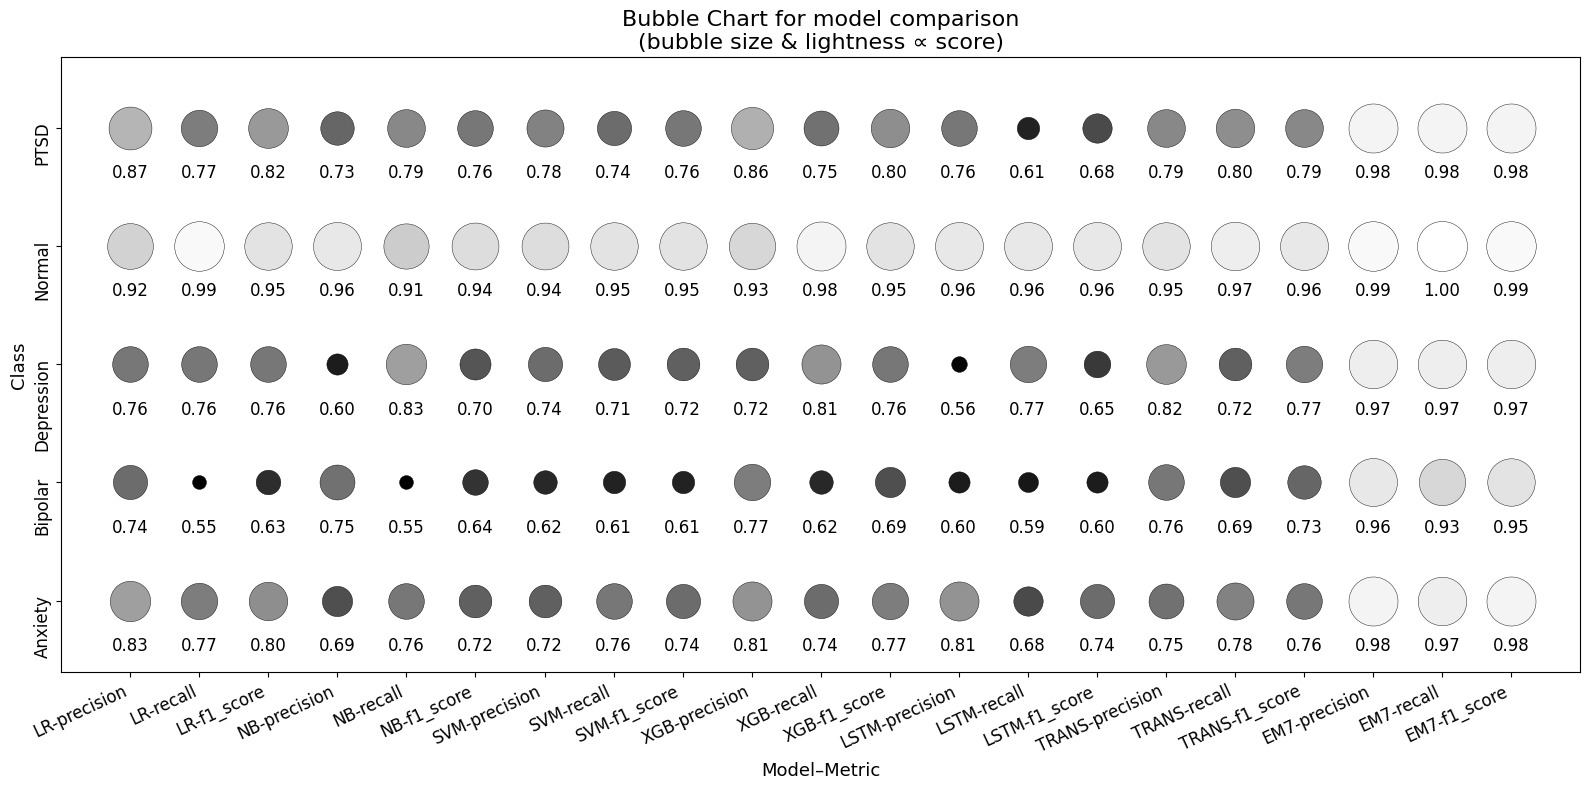

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Classes
classes = ["Anxiety", "Bipolar", "Depression", "Normal", "PTSD"]

# Model metrics dicts
models = {
    "LR": {
        "precision": [0.83, 0.74, 0.76, 0.92, 0.87],
        "recall":    [0.77, 0.55, 0.76, 0.99, 0.77],
        "f1_score":  [0.80, 0.63, 0.76, 0.95, 0.82]
    },
    "NB": {
        "precision": [0.69, 0.75, 0.60, 0.96, 0.73],
        "recall":    [0.76, 0.55, 0.83, 0.91, 0.79],
        "f1_score":  [0.72, 0.64, 0.70, 0.94, 0.76]
    },
    "SVM": {
        "precision": [0.72, 0.62, 0.74, 0.94, 0.78],
        "recall":    [0.76, 0.61, 0.71, 0.95, 0.74],
        "f1_score":  [0.74, 0.61, 0.72, 0.95, 0.76]
    },
    "XGB": {
        "precision": [0.81, 0.77, 0.72, 0.93, 0.86],
        "recall":    [0.74, 0.62, 0.81, 0.98, 0.75],
        "f1_score":  [0.77, 0.69, 0.76, 0.95, 0.80]
    },
    "LSTM": {
        "precision": [0.81, 0.60, 0.56, 0.96, 0.76],
        "recall":    [0.68, 0.59, 0.77, 0.96, 0.61],
        "f1_score":  [0.74, 0.60, 0.65, 0.96, 0.68]
    },
    "TRANS": {
        "precision": [0.75, 0.76, 0.82, 0.95, 0.79],
        "recall":    [0.78, 0.69, 0.72, 0.97, 0.80],
        "f1_score":  [0.76, 0.73, 0.77, 0.96, 0.79]
    },
    "EM7": {
        "precision": [0.98, 0.96, 0.97, 0.99, 0.98],
        "recall":    [0.97, 0.93, 0.97, 1.00, 0.98],
        "f1_score":  [0.98, 0.95, 0.97, 0.99, 0.98]
    }
}

# Prepare data
metrics = ["precision","recall","f1_score"]
row_labels = [f"{m}-{met}" for m in models for met in metrics]
data = np.vstack([ models[m][met] for m in models for met in metrics ]).T
df = pd.DataFrame(data, index=classes, columns=row_labels)

# Normalize for size/shade
norm = (df - df.min().min())/(df.max().max() - df.min().min())

# Plot bubble chart with bottom annotations
plt.figure(figsize=(16, 8))
for i, cls in enumerate(classes):
    for j, col in enumerate(df.columns):
        score = df.iloc[i, j]
        size  = 1200 * norm.iloc[i, j] + 100
        shade = norm.iloc[i, j]
        plt.scatter(j, i, s=size,
                    c=[[shade,shade,shade]],
                    edgecolor='black', linewidth=0.3)
        # annotate at bottom of bubble
        plt.text(j, i - 0.3, f"{score:.2f}",
                 ha='center', va='top',
                 fontsize=12, color='black')

# Adjust y-limits to add space below Anxiety row
plt.ylim(-0.6, len(classes) - 0.4)

# Axes & labels
plt.xticks(np.arange(len(df.columns)), df.columns, rotation=25, ha='right', fontsize=12)
plt.yticks(np.arange(len(classes)), classes, rotation=90, fontsize=12)
plt.xlabel("Model–Metric", fontsize=13)
plt.ylabel("Class", fontsize=13)
plt.title("Bubble Chart for model comparison\n(bubble size & lightness ∝ score)", fontsize=16)
plt.grid(False)
plt.tight_layout()
plt.show()


# COMPARISON OF 7 ENSEMBLE MODELS

<ipython-input-10-51684c56a1ab>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df, ax=ax[0, 0], palette='Blues_d')
<ipython-input-10-51684c56a1ab>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Precision', data=df, ax=ax[0, 1], palette='Greens_d')
<ipython-input-10-51684c56a1ab>:43: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Recall', data=df, ax=ax[1, 0], palette='Reds_d')
<ipython-input-10-51684c56a1ab>:49: FutureWarning: 

Passing `palette` without assigning `hue` is deprec

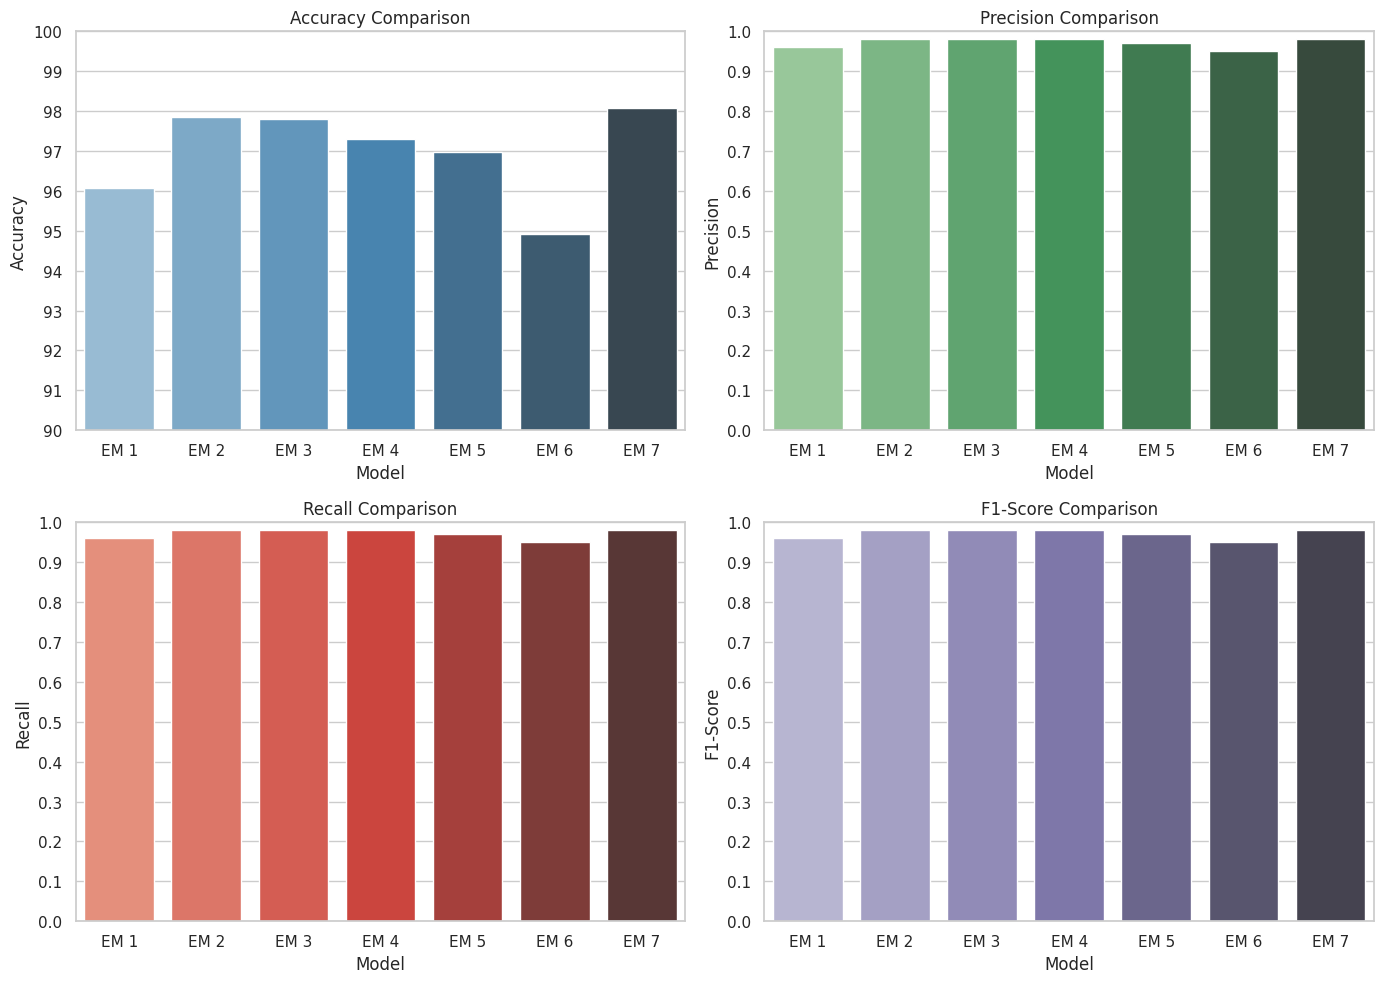

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Data for models' classification reports
models = ['EM 1', 'EM 2', 'EM 3', 'EM 4', 'EM 5', 'EM 6', 'EM 7']
accuracies = [96.08, 97.84, 97.81, 97.29, 96.98, 94.93, 98.07]
precision = [0.96, 0.98, 0.98, 0.98, 0.97, 0.95, 0.98]  # Weighted average precision
recall = [0.96, 0.98, 0.98, 0.98, 0.97, 0.95, 0.98]  # Weighted average recall
f1_score = [0.96, 0.98, 0.98, 0.98, 0.97, 0.95, 0.98]  # Weighted average F1-score

# Create a dataframe for easy plotting
data = {
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
}

df = pd.DataFrame(data)

# Set the seaborn style
sns.set(style="whitegrid")

# Create a figure with 2 rows and 2 columns of subplots
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy Barplot (Top-Left)
sns.barplot(x='Model', y='Accuracy', data=df, ax=ax[0, 0], palette='Blues_d')
ax[0, 0].set_title('Accuracy Comparison')
ax[0, 0].set_ylim(90, 100)  # Set Y-axis limits for accuracy
ax[0, 0].set_yticks(np.arange(90, 101, 1))  # Set Y-axis ticks with 1-unit difference

# Precision Barplot (Top-Right)
sns.barplot(x='Model', y='Precision', data=df, ax=ax[0, 1], palette='Greens_d')
ax[0, 1].set_title('Precision Comparison')
ax[0, 1].set_ylim(0, 1)  # Set Y-axis limits for precision
ax[0, 1].set_yticks(np.arange(0.0, 1.1, 0.1))  # Set Y-axis ticks with 0.1-unit difference

# Recall Barplot (Bottom-Left)
sns.barplot(x='Model', y='Recall', data=df, ax=ax[1, 0], palette='Reds_d')
ax[1, 0].set_title('Recall Comparison')
ax[1, 0].set_ylim(0, 1)  # Set Y-axis limits for recall
ax[1, 0].set_yticks(np.arange(0.0, 1.1, 0.1))  # Set Y-axis ticks with 0.1-unit difference

# F1-Score Barplot (Bottom-Right)
sns.barplot(x='Model', y='F1-Score', data=df, ax=ax[1, 1], palette='Purples_d')
ax[1, 1].set_title('F1-Score Comparison')
ax[1, 1].set_ylim(0, 1)  # Set Y-axis limits for F1-Score
ax[1, 1].set_yticks(np.arange(0.0, 1.1, 0.1))  # Set Y-axis ticks with 0.1-unit difference

# Adjust layout and show plot
plt.tight_layout()
plt.show()


<ipython-input-33-87f001f088bd>:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-33-87f001f088bd>:42: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-33-87f001f088bd>:51: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(
<ipython-input-33-87f001f088bd>:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


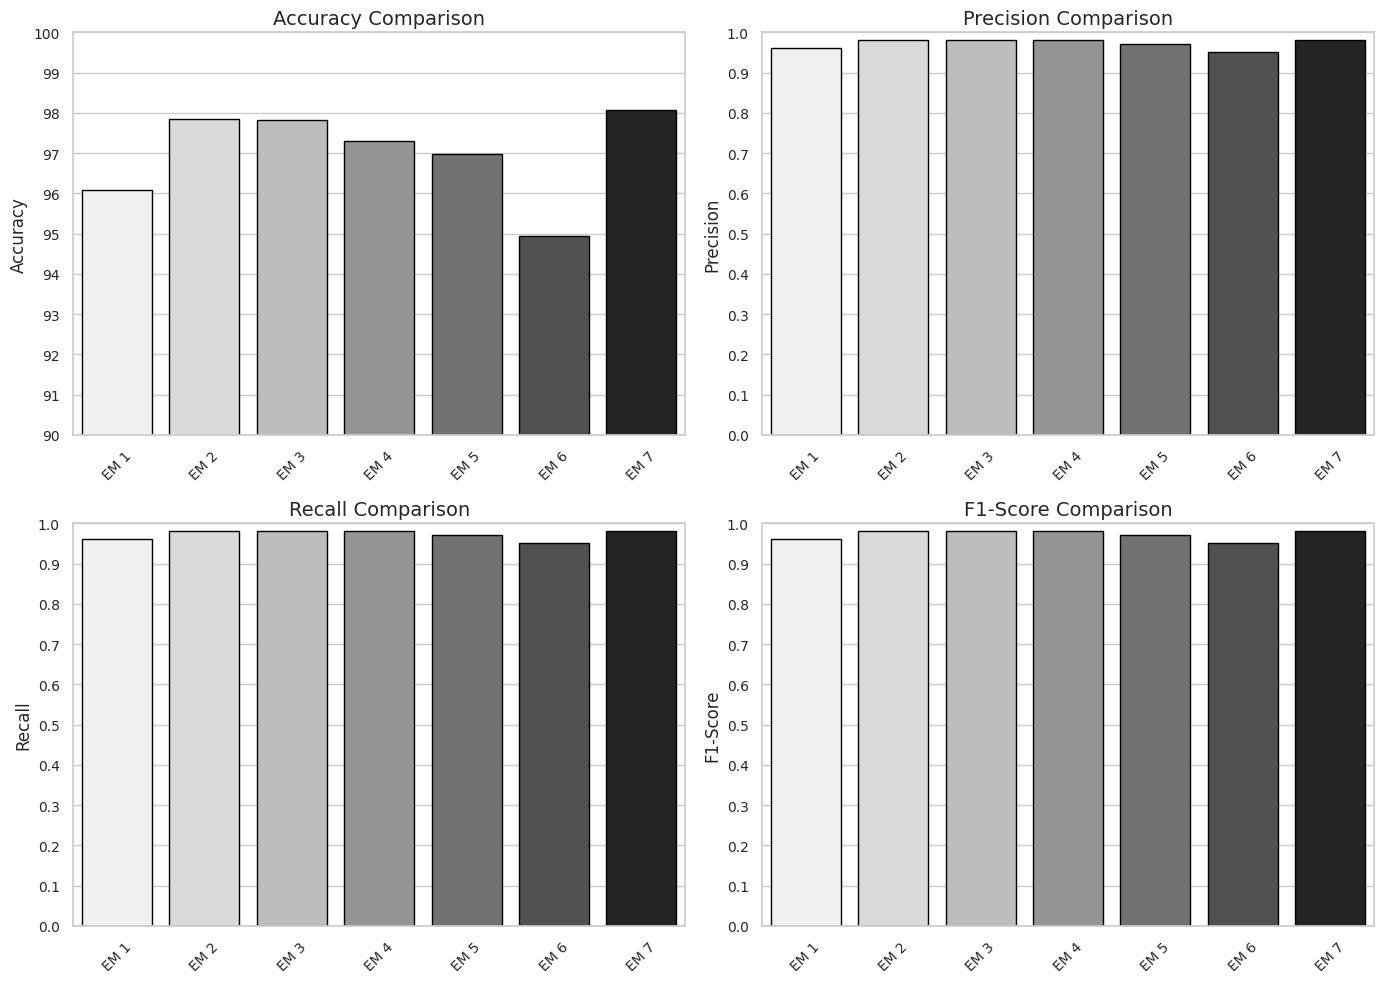

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Data for models' classification reports
models = ['EM 1', 'EM 2', 'EM 3', 'EM 4', 'EM 5', 'EM 6', 'EM 7']
accuracies = [96.08, 97.84, 97.81, 97.29, 96.98, 94.93, 98.07]
precision = [0.96, 0.98, 0.98, 0.98, 0.97, 0.95, 0.98]
recall    = [0.96, 0.98, 0.98, 0.98, 0.97, 0.95, 0.98]
f1_score  = [0.96, 0.98, 0.98, 0.98, 0.97, 0.95, 0.98]

# Create a dataframe for easy plotting
data = {
    'Model': models,
    'Accuracy': accuracies,
    'Precision': precision,
    'Recall': recall,
    'F1-Score': f1_score
}
df = pd.DataFrame(data)

# Generate 7 grey shades from darkest to lightest
grey_shades = list((sns.color_palette("Greys", n_colors=len(models))))

# Set seaborn style
sns.set(style="whitegrid")

# Create a figure with 2 rows and 2 columns of subplots
fig, ax = plt.subplots(2, 2, figsize=(14, 10))

# Accuracy Barplot (Top-Left)
sns.barplot(
    x='Model', y='Accuracy', data=df, ax=ax[0, 0],
    palette=grey_shades, edgecolor='black'
)
ax[0, 0].set_title('Accuracy Comparison', fontsize=14)
ax[0, 0].set_ylim(90, 100)
ax[0, 0].set_yticks(np.arange(90, 101, 1))

# Precision Barplot (Top-Right)
sns.barplot(
    x='Model', y='Precision', data=df, ax=ax[0, 1],
    palette=grey_shades, edgecolor='black'
)
ax[0, 1].set_title('Precision Comparison', fontsize=14)
ax[0, 1].set_ylim(0, 1)
ax[0, 1].set_yticks(np.arange(0.0, 1.1, 0.1))

# Recall Barplot (Bottom-Left)
sns.barplot(
    x='Model', y='Recall', data=df, ax=ax[1, 0],
    palette=grey_shades, edgecolor='black'
)
ax[1, 0].set_title('Recall Comparison', fontsize=14)
ax[1, 0].set_ylim(0, 1)
ax[1, 0].set_yticks(np.arange(0.0, 1.1, 0.1))

# F1-Score Barplot (Bottom-Right)
sns.barplot(
    x='Model', y='F1-Score', data=df, ax=ax[1, 1],
    palette=grey_shades, edgecolor='black'
)
ax[1, 1].set_title('F1-Score Comparison', fontsize=14)
ax[1, 1].set_ylim(0, 1)
ax[1, 1].set_yticks(np.arange(0.0, 1.1, 0.1))

# Uniform label formatting
for axi in ax.flat:
    axi.set_xlabel('')
    axi.set_ylabel(axi.get_ylabel(), fontsize=12)
    axi.tick_params(axis='x', rotation=45, labelsize=10)
    axi.tick_params(axis='y', labelsize=10)

# Overall adjustments
plt.tight_layout()
plt.show()


# STATISTICS OF DATA COLLECTED FROM REDDIT

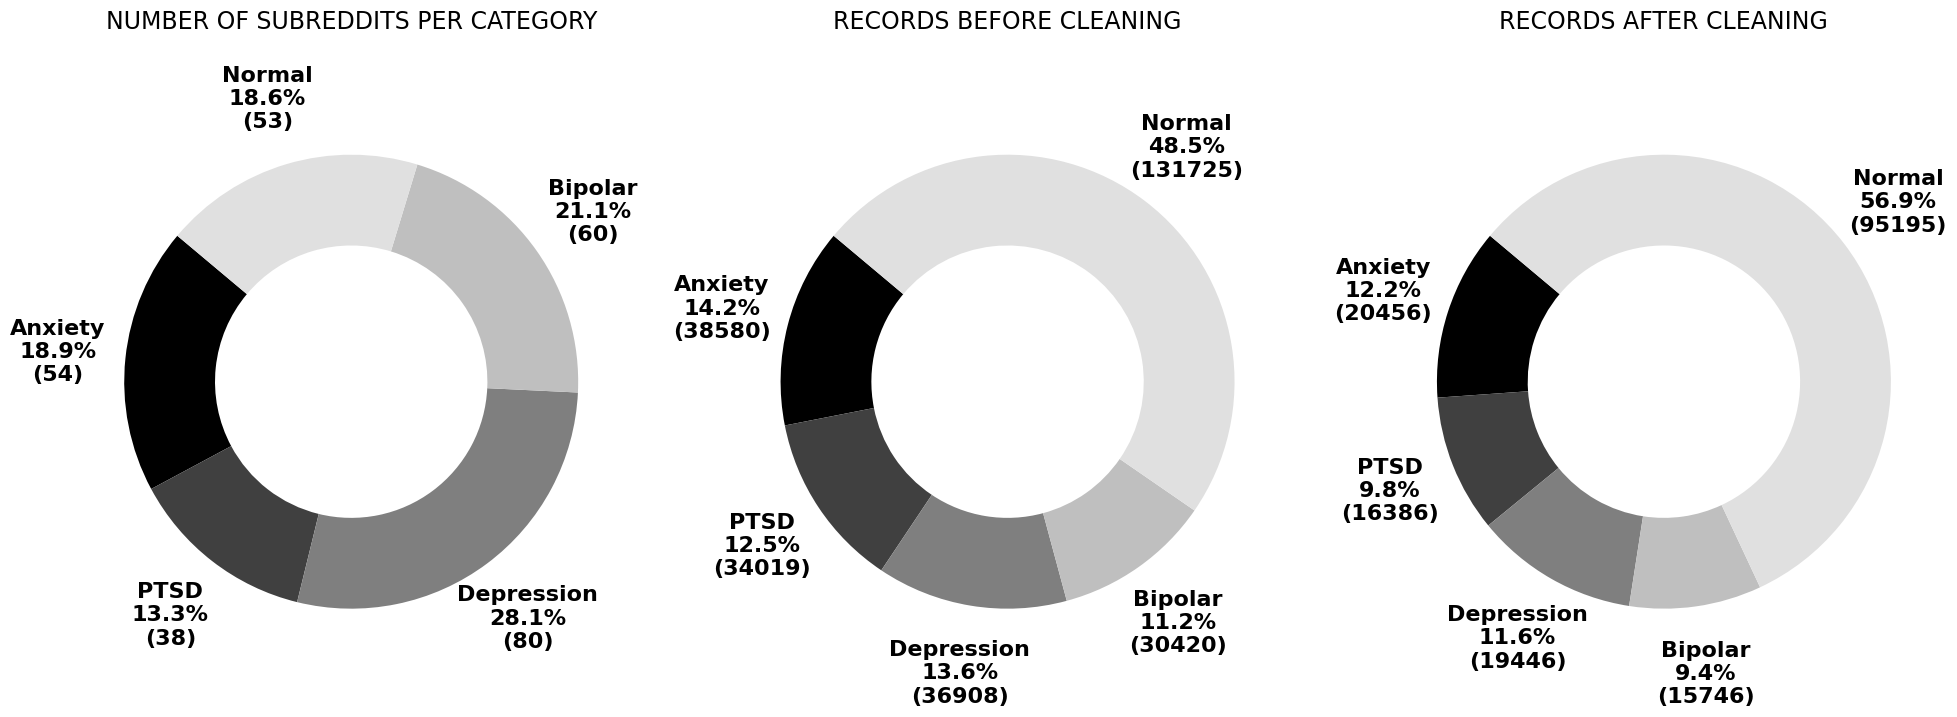

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Data
categories = ['Anxiety', 'PTSD', 'Depression', 'Bipolar', 'Normal']
subreddits_count = [54, 38, 80, 60, 53]
before_cleaning = [38580, 34019, 36908, 30420, 131725]
after_cleaning = [20456, 16386, 19446, 15746, 95195]

# Create a DataFrame
data = pd.DataFrame({
    'Category': categories,
    'Subreddits': subreddits_count,
    'Before Cleaning': before_cleaning,
    'After Cleaning': after_cleaning
})

# Function to add category, percentage, and actual number labels around the donut
def add_labels(patches, percents, actual_numbers, categories):
    for patch, percent, actual, cat in zip(patches, percents, actual_numbers, categories):
        angle = (patch.theta2 - patch.theta1) / 2.0 + patch.theta1
        x = np.cos(np.radians(angle))
        y = np.sin(np.radians(angle))
        label = f"{cat}\n{percent}\n({actual})"
        plt.text(
            x * 1.3, y * 1.3, label,
            ha='center', va='center', fontweight='bold', fontsize=16  # increased fontsize
        )

# Define grayscale color palette
grayscale_colors = ['#000000', '#404040', '#7f7f7f', '#bfbfbf', '#e0e0e0']

# Plotting
plt.figure(figsize=(20, 10))   # increased height from 8 to 10

# Subreddits Count (Donut Chart)
plt.subplot(1, 3, 1)
patches, _ = plt.pie(
    data['Subreddits'], labels=None, startangle=140,
    wedgeprops={'width': 0.4}, colors=grayscale_colors
)
percents = [f"{p}%" for p in (data['Subreddits'] / sum(data['Subreddits']) * 100).round(1)]
add_labels(patches, percents, data['Subreddits'], data['Category'])
plt.title('NUMBER OF SUBREDDITS PER CATEGORY', pad=50, fontsize=17)

# Records Before Cleaning (Donut Chart)
plt.subplot(1, 3, 2)
patches, _ = plt.pie(
    data['Before Cleaning'], labels=None, startangle=140,
    wedgeprops={'width': 0.4}, colors=grayscale_colors
)
percents = [f"{p}%" for p in (data['Before Cleaning'] / sum(data['Before Cleaning']) * 100).round(1)]
add_labels(patches, percents, data['Before Cleaning'], data['Category'])
plt.title('RECORDS BEFORE CLEANING', pad=50, fontsize=17)

# Records After Cleaning (Donut Chart)
plt.subplot(1, 3, 3)
patches, _ = plt.pie(
    data['After Cleaning'], labels=None, startangle=140,
    wedgeprops={'width': 0.4}, colors=grayscale_colors
)
percents = [f"{p}%" for p in (data['After Cleaning'] / sum(data['After Cleaning']) * 100).round(1)]
add_labels(patches, percents, data['After Cleaning'], data['Category'])
plt.title('RECORDS AFTER CLEANING', pad=50, fontsize=17)

# Adjust layout
plt.tight_layout(pad=2.0)
plt.subplots_adjust(bottom=0.15)  # extra bottom space
plt.show()
